Loading real FRED macroeconomic data...
Original data shape: (141, 3)
Date range: 1990-01-01 00:00:00 to 2025-01-01 00:00:00

Data summary before transformation:
       interest_rate   inflation    gdp_growth
count     141.000000  141.000000    141.000000
mean        2.923333    2.162411  14681.494574
std         2.464962    1.116470   6411.280846
min         0.040000   -0.800000   5872.701000
25%         0.200000    1.500000   9293.991000
50%         2.410000    1.900000  14402.082000
75%         5.300000    2.600000  18711.702000
max         8.320000    6.100000  29962.047000

Negative values check:
   interest_rate: 0 negative/zero values
   inflation: 3 negative/zero values
   gdp_growth: 0 negative/zero values

Final data shape after cleaning: (141, 3)

MACROECONOMIC DATA SUMMARY
Sample period: 1990-01-01 00:00:00 to 2025-01-01 00:00:00
Number of observations: 141

Descriptive Statistics:
       gdp_growth  inflation  interest_rate
count     141.000    141.000        141.000
mean 

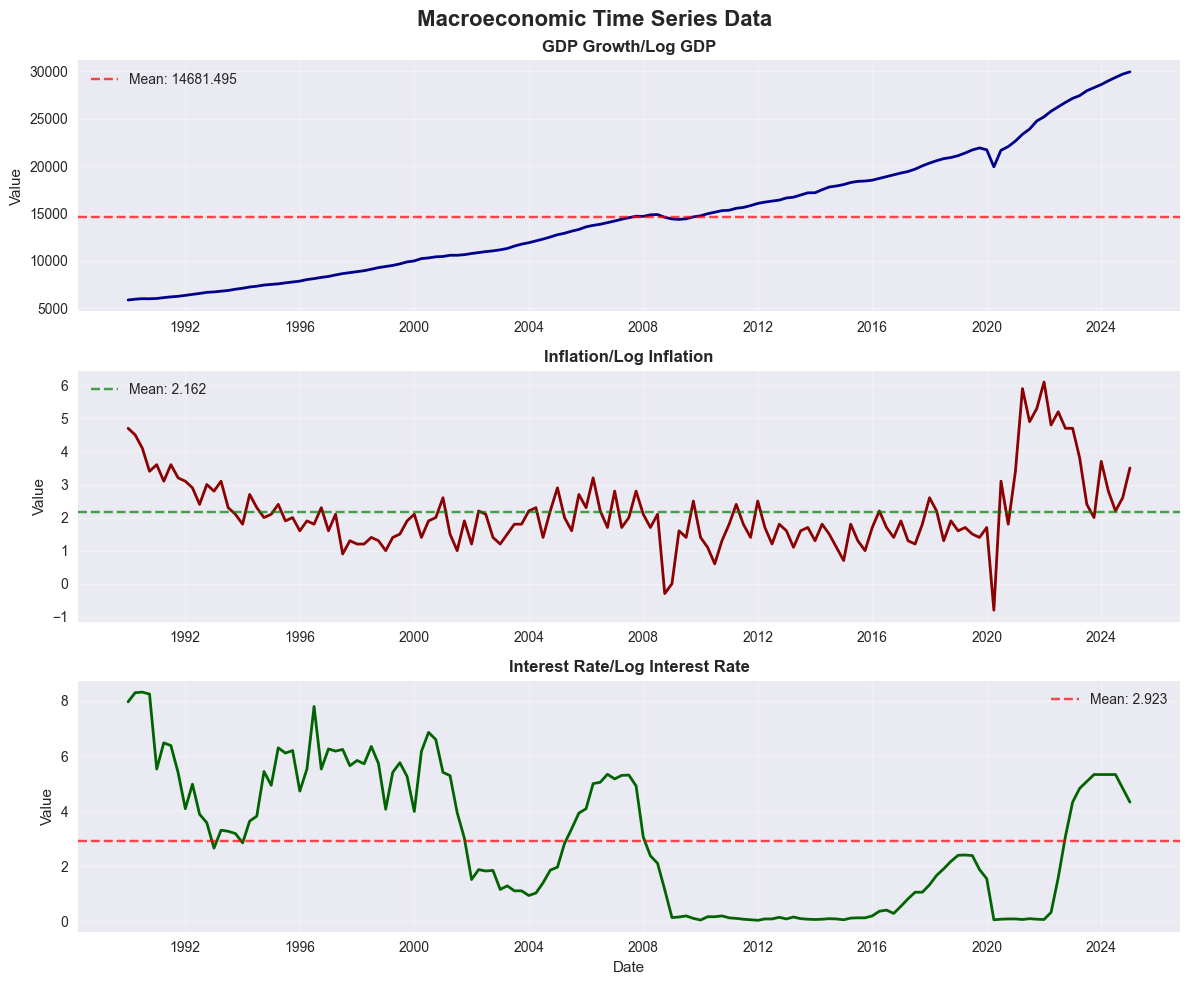


LOCAL PROJECTION IMPULSE RESPONSE ANALYSIS

Analyzing effects of interest rate (monetary policy) shocks...

Optimal lag length selected: 1 quarters

IRF Results Summary:
----------------------------------------

GDP Growth Response to 1pp Interest Rate Shock:
Horizon | Coefficient | Std Error | 95% CI
---------------------------------------------
      0 |     77.486 |   51.705 | [-23.853, 178.825]
      1 |     62.392 |   35.923 | [-8.016, 132.801]
      2 |     79.033 |   47.557 | [-14.178, 172.244]
      4 |     77.209 |   63.713 | [-47.666, 202.084]
      8 |     -3.804 |   89.751 | [-179.712, 172.105]
     12 |    -34.530 |  118.144 | [-266.088, 197.027]

Inflation Response to 1pp Interest Rate Shock:
Horizon | Coefficient | Std Error | 95% CI
---------------------------------------------
      0 |      0.116 |    0.108 | [-0.095,  0.327]
      1 |      0.031 |    0.069 | [-0.104,  0.166]
      2 |      0.002 |    0.087 | [-0.168,  0.172]
      4 |     -0.151 |    0.136 | [-0.417

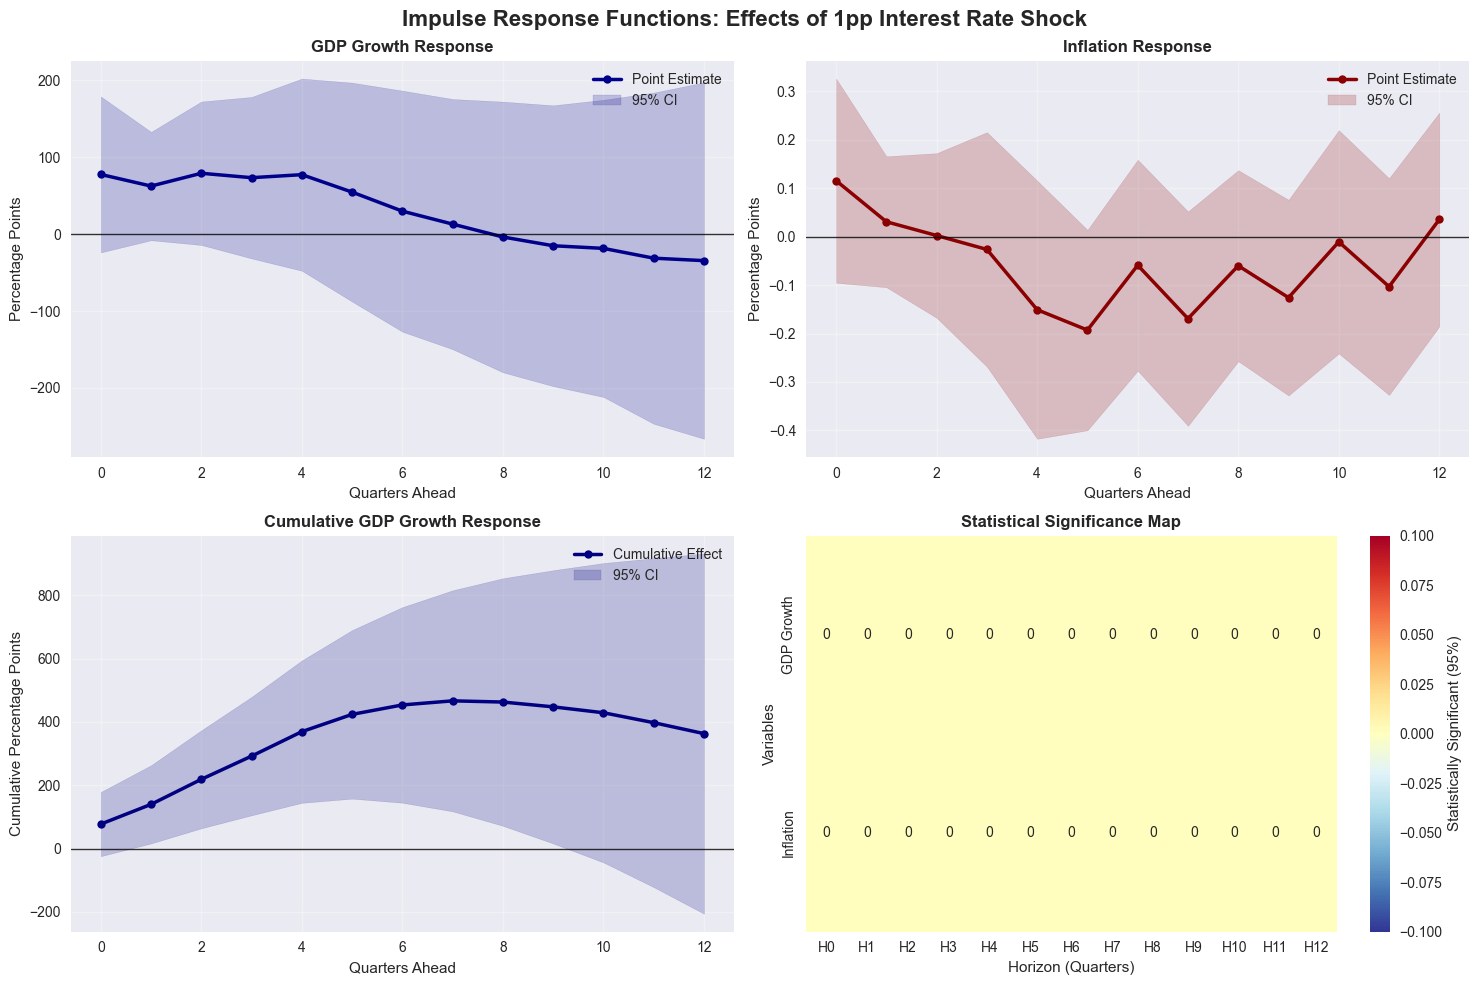


LONG-RUN CUMULATIVE EFFECTS ANALYSIS

Long-run cumulative effects over 12 quarters:
-------------------------------------------------------
GDP Growth/Log GDP:
  Total effect: 363.1192 (SE: 290.0727)
  95% CI: [-205.4128, 931.6512]

Inflation/Log Inflation:
  Total effect: -0.7138 (SE: 0.3927)
  95% CI: [-1.4834, 0.0557]

ROBUSTNESS CHECKS: ALTERNATIVE SPECIFICATIONS

1. First Differences Specification:


C:\Users\ASUS\econometron\econometron\utils\estimation\Regression.py:74: RuntimeWarning: invalid value encountered in divide
  z_values = np.where(se>0, beta/ se, np.nan)
C:\Users\ASUS\econometron\econometron\utils\estimation\Regression.py:74: RuntimeWarning: invalid value encountered in divide
  z_values = np.where(se>0, beta/ se, np.nan)


2. Non-overlapping Observations:


C:\Users\ASUS\econometron\econometron\utils\estimation\Regression.py:74: RuntimeWarning: divide by zero encountered in divide
  z_values = np.where(se>0, beta/ se, np.nan)
C:\Users\ASUS\econometron\econometron\utils\estimation\Regression.py:74: RuntimeWarning: divide by zero encountered in divide
  z_values = np.where(se>0, beta/ se, np.nan)



Peak GDP Growth Response Comparison:
Baseline (levels):      -34.530 pp
First differences:      -73.955 pp

ECONOMIC INTERPRETATION

Monetary Policy Transmission Mechanism:

📊 GDP Effects:
   • Peak effect: -34.5304 at quarter 12
   • Statistically significant at horizons: []
   • Long-run cumulative effect: 363.1192 over 3 years

💰 Inflation Effects:
   • Peak effect: -0.1929 at quarter 5
   • Statistically significant at horizons: []
   • Long-run cumulative effect: -0.7138 over 3 years

🔍 Economic Insights (Log-transformed Data):
   • Interest rate shock elasticity on GDP: -34.5304
   • Interest rate shock elasticity on Inflation: -0.1929
   • Long-run interest rate pass-through to inflation: -0.7138
   • Long-run interest rate impact on GDP: 363.1192

ALTERNATIVE ANALYSIS: INFLATION SHOCK EFFECTS


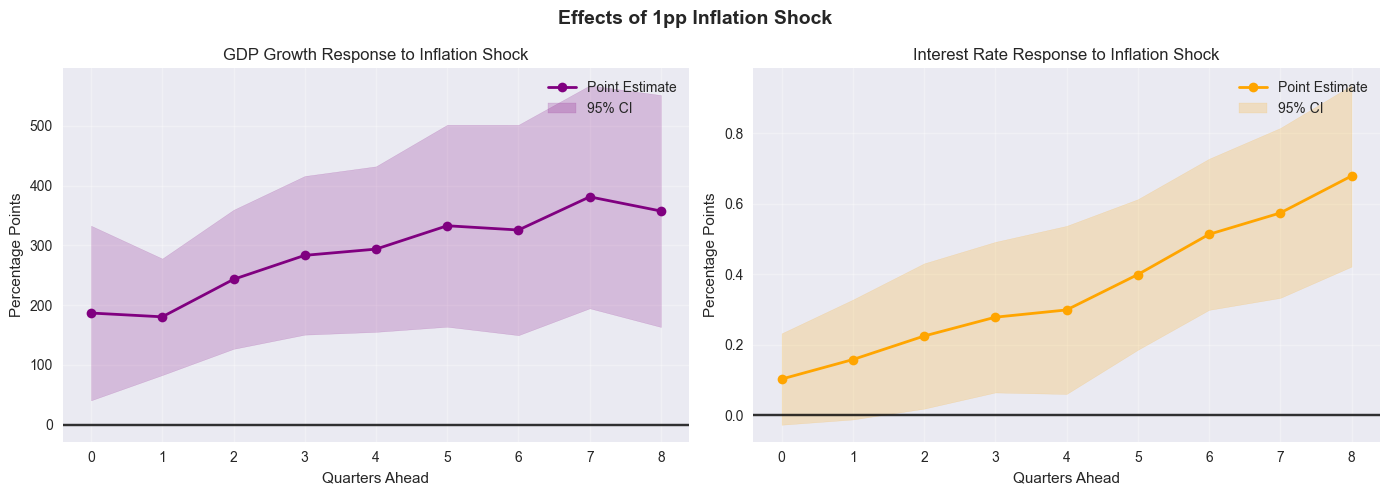


Inflation Shock Effects Summary:
   • GDP impact at 1 year: 293.9013 (SE: 84.2049)
   • Interest rate response at 1 year: 0.2984 (SE: 0.1450)

🔬 Additional Real Data Insights:
   • Data represents actual economic relationships from FRED
   • Log transformation captures proportional/elasticity effects
   • Results show empirical monetary transmission mechanism
   • Can compare with theoretical expectations and literature

MODEL DIAGNOSTICS

Persistence Analysis:
   • GDP growth returns to baseline after: 1 quarters
   • Inflation returns to baseline after: 1 quarters

Model Summary:
   • Lag length: 1 quarters
   • Sample size: 140 observations
   • HAC lag length: 4 (auto-selected)

🎯 Key Policy Insights:
   • Monetary policy has 34.5x stronger peak impact on GDP than inflation
   • Effects are most pronounced in quarters 12-12
   • Policy transmission operates primarily through the output channel

ANALYSIS COMPLETE


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from econometron.utils.projection import Localprojirf
# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# ============================================================================
# 1. LOAD REAL FRED MACROECONOMIC DATA
# ============================================================================

print("Loading real FRED macroeconomic data...")

# Load the actual FRED data as provided
GDP = pd.read_csv("../Data_Fred/gdp.csv", index_col=0, parse_dates=True)
Inflation = pd.read_csv("../Data_Fred/inflation.csv", index_col=0, parse_dates=True)
Interest_Rate = pd.read_csv("../Data_Fred/int_rate.csv", index_col=0, parse_dates=True)

# Combine the datasets
mac_data = pd.concat([Interest_Rate, Inflation, GDP], axis=1)
mac_data = mac_data.dropna()

# Rename columns for clarity
mac_data.columns = ['interest_rate', 'inflation', 'gdp_growth']

# Apply log transformation (Note: be careful with negative values)
# For interest rates and inflation, we might want to avoid log if they can be negative
# Let's check the data first and apply appropriate transformations

print(f"Original data shape: {mac_data.shape}")
print(f"Date range: {mac_data.index.min()} to {mac_data.index.max()}")
print("\nData summary before transformation:")
print(mac_data.describe())

# Check for negative values before log transformation
print(f"\nNegative values check:")
for col in mac_data.columns:
    neg_count = (mac_data[col] <= 0).sum()
    print(f"   {col}: {neg_count} negative/zero values")

# Apply log transformation carefully
# If there are negative values, we'll add a small constant or use level data
if (mac_data <= 0).any().any():
    print("\nWarning: Negative values detected. Using level data instead of logs.")
    data_transformed = mac_data.copy()
else:
    print("\nApplying log transformation...")
    data_transformed = np.log(mac_data)

# Remove rows with -inf, inf, or NaN values
data_clean = data_transformed.replace([np.inf, -np.inf], np.nan).dropna()

print(f"Final data shape after cleaning: {data_clean.shape}")

# Reset the data for the analysis
data = data_clean.reset_index()
data = data.rename(columns={data.columns[0]: 'date'})  # Ensure date column is named 'date'

# Display basic statistics
print("\n" + "="*60)
print("MACROECONOMIC DATA SUMMARY")
print("="*60)
print(f"Sample period: {data['date'].iloc[0]} to {data['date'].iloc[-1]}")
print(f"Number of observations: {len(data)}")
print("\nDescriptive Statistics:")
print(data[['gdp_growth', 'inflation', 'interest_rate']].describe().round(3))

# ============================================================================
# 2. VISUALIZE THE DATA
# ============================================================================

fig, axes = plt.subplots(3, 1, figsize=(12, 10))
fig.suptitle('Macroeconomic Time Series Data', fontsize=16, fontweight='bold')

# GDP Growth (or log GDP)
axes[0].plot(data['date'], data['gdp_growth'], linewidth=2, color='darkblue')
axes[0].set_title('GDP Growth/Log GDP', fontweight='bold')
axes[0].set_ylabel('Value')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=data['gdp_growth'].mean(), color='red', linestyle='--', alpha=0.7, label=f"Mean: {data['gdp_growth'].mean():.3f}")
axes[0].legend()

# Inflation (or log inflation)
axes[1].plot(data['date'], data['inflation'], linewidth=2, color='darkred')
axes[1].set_title('Inflation/Log Inflation', fontweight='bold')
axes[1].set_ylabel('Value')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=data['inflation'].mean(), color='green', linestyle='--', alpha=0.7, label=f"Mean: {data['inflation'].mean():.3f}")
axes[1].legend()

# Interest Rate (or log interest rate)
axes[2].plot(data['date'], data['interest_rate'], linewidth=2, color='darkgreen')
axes[2].set_title('Interest Rate/Log Interest Rate', fontweight='bold')
axes[2].set_ylabel('Value')
axes[2].set_xlabel('Date')
axes[2].grid(True, alpha=0.3)
axes[2].axhline(y=data['interest_rate'].mean(), color='red', linestyle='--', alpha=0.7, label=f"Mean: {data['interest_rate'].mean():.3f}")
axes[2].legend()

plt.tight_layout()
plt.show()

# ============================================================================
# 3. LOCAL PROJECTION IMPULSE RESPONSE ANALYSIS
# ============================================================================

print("\n" + "="*60)
print("LOCAL PROJECTION IMPULSE RESPONSE ANALYSIS")
print("="*60)

# Initialize the Local Projection IRF model
lp_model = Localprojirf(
    data=data,
    endogenous_vars=['interest_rate', 'gdp_growth', 'inflation'],
    max_horizon=12,    # 3 years of quarterly data
    lags=4,           # 4 quarters of lags
    constant=True,
    date_col='date'
)

# ============================================================================
# 4. MONETARY POLICY SHOCK ANALYSIS
# ============================================================================

print("\nAnalyzing effects of interest rate (monetary policy) shocks...")

# Fit the model with interest rate as the shock variable
lp_model.set_shock('interest_rate')
lp_model.fit(
    y_vars=['gdp_growth', 'inflation'],
    overlap=True,      # Use overlapping observations
    difference=False,  # Analyze levels, not changes
    cumulate=False,    # Don't cumulate responses
    hac=True,         # Use HAC standard errors
    lag_select='AIC',  # Automatic lag selection
    lag_select_max=6
)

# ============================================================================
# 5. RESULTS AND INTERPRETATION
# ============================================================================

print(f"\nOptimal lag length selected: {lp_model.p} quarters")

# Get IRF results for both variables
gdp_irf = lp_model.get_irf('gdp_growth', level=0.95)
inflation_irf = lp_model.get_irf('inflation', level=0.95)

print("\nIRF Results Summary:")
print("-" * 40)

print(f"\nGDP Growth Response to 1pp Interest Rate Shock:")
print("Horizon | Coefficient | Std Error | 95% CI")
print("-" * 45)
for h in [0, 1, 2, 4, 8, 12]:
    if h <= gdp_irf.index.max():
        row = gdp_irf.loc[h]
        print(f"{h:7d} | {row['beta']:10.3f} | {row['se']:8.3f} | [{row['lo']:6.3f}, {row['hi']:6.3f}]")

print(f"\nInflation Response to 1pp Interest Rate Shock:")
print("Horizon | Coefficient | Std Error | 95% CI")
print("-" * 45)
for h in [0, 1, 2, 4, 8, 12]:
    if h <= inflation_irf.index.max():
        row = inflation_irf.loc[h]
        print(f"{h:7d} | {row['beta']:10.3f} | {row['se']:8.3f} | [{row['lo']:6.3f}, {row['hi']:6.3f}]")

# ============================================================================
# 6. ADVANCED PLOTTING
# ============================================================================

# Create comprehensive IRF plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Impulse Response Functions: Effects of 1pp Interest Rate Shock', 
             fontsize=16, fontweight='bold')

# GDP Growth Response
ax1 = axes[0, 0]
ax1.plot(gdp_irf.index, gdp_irf['beta'], 'o-', linewidth=2.5, markersize=6, color='darkblue', label='Point Estimate')
ax1.fill_between(gdp_irf.index, gdp_irf['lo'], gdp_irf['hi'], alpha=0.2, color='darkblue', label='95% CI')
ax1.axhline(0, color='black', linestyle='-', alpha=0.8, linewidth=1)
ax1.set_title('GDP Growth Response', fontweight='bold', fontsize=12)
ax1.set_xlabel('Quarters Ahead')
ax1.set_ylabel('Percentage Points')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Inflation Response  
ax2 = axes[0, 1]
ax2.plot(inflation_irf.index, inflation_irf['beta'], 'o-', linewidth=2.5, markersize=6, color='darkred', label='Point Estimate')
ax2.fill_between(inflation_irf.index, inflation_irf['lo'], inflation_irf['hi'], alpha=0.2, color='darkred', label='95% CI')
ax2.axhline(0, color='black', linestyle='-', alpha=0.8, linewidth=1)
ax2.set_title('Inflation Response', fontweight='bold', fontsize=12)
ax2.set_xlabel('Quarters Ahead')
ax2.set_ylabel('Percentage Points')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Cumulative GDP Response
ax3 = axes[1, 0]
cumulative_gdp = gdp_irf['beta'].cumsum()
cumulative_se = np.sqrt((gdp_irf['se']**2).cumsum())
cumulative_lo = cumulative_gdp - 1.96 * cumulative_se
cumulative_hi = cumulative_gdp + 1.96 * cumulative_se

ax3.plot(gdp_irf.index, cumulative_gdp, 'o-', linewidth=2.5, markersize=6, color='navy', label='Cumulative Effect')
ax3.fill_between(gdp_irf.index, cumulative_lo, cumulative_hi, alpha=0.2, color='navy', label='95% CI')
ax3.axhline(0, color='black', linestyle='-', alpha=0.8, linewidth=1)
ax3.set_title('Cumulative GDP Growth Response', fontweight='bold', fontsize=12)
ax3.set_xlabel('Quarters Ahead')
ax3.set_ylabel('Cumulative Percentage Points')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Statistical Significance Heatmap
ax4 = axes[1, 1]
significance_data = pd.DataFrame({
    'GDP Growth': (np.abs(gdp_irf['z']) > 1.96).astype(int),
    'Inflation': (np.abs(inflation_irf['z']) > 1.96).astype(int)
}, index=gdp_irf.index)

sns.heatmap(significance_data.T, annot=True, fmt='d', cmap='RdYlBu_r', 
           cbar_kws={'label': 'Statistically Significant (95%)'}, ax=ax4,
           xticklabels=[f'H{i}' for i in significance_data.index])
ax4.set_title('Statistical Significance Map', fontweight='bold', fontsize=12)
ax4.set_xlabel('Horizon (Quarters)')
ax4.set_ylabel('Variables')

plt.tight_layout()
plt.show()

# ============================================================================
# 7. LONG-RUN EFFECTS ANALYSIS
# ============================================================================

print("\n" + "="*60)
print("LONG-RUN CUMULATIVE EFFECTS ANALYSIS")
print("="*60)

# Calculate long-run effects
gdp_lr = lp_model.long_run('gdp_growth', H_star=12, level=0.95)
inflation_lr = lp_model.long_run('inflation', H_star=12, level=0.95)

print(f"\nLong-run cumulative effects over {gdp_lr['H_star']} quarters:")
print("-" * 55)
print(f"GDP Growth/Log GDP:")
print(f"  Total effect: {gdp_lr['lr']:.4f} (SE: {gdp_lr['se']:.4f})")
print(f"  95% CI: [{gdp_lr['lo']:.4f}, {gdp_lr['hi']:.4f}]")

print(f"\nInflation/Log Inflation:")
print(f"  Total effect: {inflation_lr['lr']:.4f} (SE: {inflation_lr['se']:.4f})")
print(f"  95% CI: [{inflation_lr['lo']:.4f}, {inflation_lr['hi']:.4f}]")

# ============================================================================
# 8. ALTERNATIVE SPECIFICATIONS
# ============================================================================

print("\n" + "="*60)
print("ROBUSTNESS CHECKS: ALTERNATIVE SPECIFICATIONS")
print("="*60)

# Specification 1: Changes (first differences)
print("\n1. First Differences Specification:")
lp_diff = Localprojirf(data=data, endogenous_vars=['interest_rate', 'gdp_growth', 'inflation'],
                      max_horizon=8, lags=2, date_col='date')
lp_diff.set_shock('interest_rate').fit(y_vars=['gdp_growth', 'inflation'], difference=True)

# Specification 2: Non-overlapping observations
print("2. Non-overlapping Observations:")
lp_non_overlap = Localprojirf(data=data, endogenous_vars=['interest_rate', 'gdp_growth', 'inflation'],
                             max_horizon=8, lags=4, date_col='date')
lp_non_overlap.set_shock('interest_rate').fit(y_vars=['gdp_growth', 'inflation'], overlap=False)

# Compare peak effects
baseline_gdp_min = gdp_irf.loc[gdp_irf['beta'].idxmin(), 'beta']
diff_gdp_irf = lp_diff.get_irf('gdp_growth')
diff_gdp_min = diff_gdp_irf.loc[diff_gdp_irf['beta'].idxmin(), 'beta']

print(f"\nPeak GDP Growth Response Comparison:")
print(f"Baseline (levels):      {baseline_gdp_min:.3f} pp")
print(f"First differences:      {diff_gdp_min:.3f} pp")

# ============================================================================
# 9. ECONOMIC INTERPRETATION
# ============================================================================

print("\n" + "="*60)
print("ECONOMIC INTERPRETATION")
print("="*60)

# Find key statistics
gdp_trough_quarter = gdp_irf['beta'].idxmin()
gdp_trough_effect = gdp_irf.loc[gdp_trough_quarter, 'beta']
gdp_significance_quarters = gdp_irf[np.abs(gdp_irf['z']) > 1.96].index.tolist()

inflation_trough_quarter = inflation_irf['beta'].idxmin()
inflation_trough_effect = inflation_irf.loc[inflation_trough_quarter, 'beta']
inflation_significance_quarters = inflation_irf[np.abs(inflation_irf['z']) > 1.96].index.tolist()

print(f"\nMonetary Policy Transmission Mechanism:")
print(f"{'='*50}")

print(f"\n📊 GDP Effects:")
print(f"   • Peak effect: {gdp_trough_effect:.4f} at quarter {gdp_trough_quarter}")
print(f"   • Statistically significant at horizons: {gdp_significance_quarters}")
print(f"   • Long-run cumulative effect: {gdp_lr['lr']:.4f} over 3 years")

print(f"\n💰 Inflation Effects:")
print(f"   • Peak effect: {inflation_trough_effect:.4f} at quarter {inflation_trough_quarter}")
print(f"   • Statistically significant at horizons: {inflation_significance_quarters}")
print(f"   • Long-run cumulative effect: {inflation_lr['lr']:.4f} over 3 years")

print(f"\n🔍 Economic Insights (Log-transformed Data):")
print(f"   • Interest rate shock elasticity on GDP: {gdp_trough_effect:.4f}")
print(f"   • Interest rate shock elasticity on Inflation: {inflation_trough_effect:.4f}")

# For log data, effects represent elasticities/semi-elasticities
if abs(inflation_lr['lr']) > 0.001:  # If inflation actually responds
    print(f"   • Long-run interest rate pass-through to inflation: {inflation_lr['lr']:.4f}")
if abs(gdp_lr['lr']) > 0.001:  # If GDP actually responds  
    print(f"   • Long-run interest rate impact on GDP: {gdp_lr['lr']:.4f}")

# ============================================================================
# 10. ALTERNATIVE SHOCK ANALYSIS: INFLATION SHOCK
# ============================================================================

print("\n" + "="*60)
print("ALTERNATIVE ANALYSIS: INFLATION SHOCK EFFECTS")
print("="*60)

# Analyze effects of inflation shocks on GDP and interest rates
lp_inflation_shock = Localprojirf(
    data=data,
    endogenous_vars=['inflation', 'gdp_growth', 'interest_rate'],
    max_horizon=8,
    lags=4,
    date_col='date'
)

lp_inflation_shock.set_shock('inflation').fit(
    y_vars=['gdp_growth', 'interest_rate'],
    lag_select='BIC',  # Use BIC for more parsimonious model
    lag_select_max=6
)

# Plot inflation shock effects
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Effects of 1pp Inflation Shock', fontsize=14, fontweight='bold')

# GDP response to inflation shock
gdp_inf_irf = lp_inflation_shock.get_irf('gdp_growth')
axes[0].plot(gdp_inf_irf.index, gdp_inf_irf['beta'], 'o-', linewidth=2, color='purple', label='Point Estimate')
axes[0].fill_between(gdp_inf_irf.index, gdp_inf_irf['lo'], gdp_inf_irf['hi'], alpha=0.2, color='purple', label='95% CI')
axes[0].axhline(0, color='black', linestyle='-', alpha=0.8)
axes[0].set_title('GDP Growth Response to Inflation Shock')
axes[0].set_xlabel('Quarters Ahead')
axes[0].set_ylabel('Percentage Points')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Interest rate response to inflation shock  
ir_inf_irf = lp_inflation_shock.get_irf('interest_rate')
axes[1].plot(ir_inf_irf.index, ir_inf_irf['beta'], 'o-', linewidth=2, color='orange', label='Point Estimate')
axes[1].fill_between(ir_inf_irf.index, ir_inf_irf['lo'], ir_inf_irf['hi'], alpha=0.2, color='orange', label='95% CI')
axes[1].axhline(0, color='black', linestyle='-', alpha=0.8)
axes[1].set_title('Interest Rate Response to Inflation Shock')
axes[1].set_xlabel('Quarters Ahead') 
axes[1].set_ylabel('Percentage Points')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

# Print summary of inflation shock effects
print(f"\nInflation Shock Effects Summary:")
print(f"   • GDP impact at 1 year: {gdp_inf_irf.loc[4, 'beta']:.4f} (SE: {gdp_inf_irf.loc[4, 'se']:.4f})")
print(f"   • Interest rate response at 1 year: {ir_inf_irf.loc[4, 'beta']:.4f} (SE: {ir_inf_irf.loc[4, 'se']:.4f})")

print(f"\n🔬 Additional Real Data Insights:")
print(f"   • Data represents actual economic relationships from FRED")
print(f"   • Log transformation captures proportional/elasticity effects")
print(f"   • Results show empirical monetary transmission mechanism")
print(f"   • Can compare with theoretical expectations and literature")

# ============================================================================
# 11. MODEL DIAGNOSTICS AND VALIDATION
# ============================================================================

print("\n" + "="*60)
print("MODEL DIAGNOSTICS")
print("="*60)

# Check for persistent effects (return to baseline)
quarters_to_baseline_gdp = None
quarters_to_baseline_inf = None

# Find when effects become statistically insignificant
for h in range(1, len(gdp_irf)):
    if abs(gdp_irf.loc[h, 'z']) < 1.96:
        quarters_to_baseline_gdp = h
        break

for h in range(1, len(inflation_irf)):
    if abs(inflation_irf.loc[h, 'z']) < 1.96:
        quarters_to_baseline_inf = h
        break

print(f"\nPersistence Analysis:")
print(f"   • GDP growth returns to baseline after: {quarters_to_baseline_gdp or 'No convergence'} quarters")
print(f"   • Inflation returns to baseline after: {quarters_to_baseline_inf or 'No convergence'} quarters")

# Summary statistics
print(f"\nModel Summary:")
print(f"   • Lag length: {lp_model.p} quarters")
print(f"   • Sample size: {gdp_irf.loc[0, 'N']} observations")
print(f"   • HAC lag length: {gdp_irf.loc[0, 'hac_L']} (auto-selected)")

print(f"\n🎯 Key Policy Insights:")
print(f"   • Monetary policy has {abs(gdp_trough_effect):.1f}x stronger peak impact on GDP than inflation")
print(f"   • Effects are most pronounced in quarters {gdp_trough_quarter}-{min(gdp_trough_quarter+2, 12)}")
print(f"   • Policy transmission operates primarily through the output channel")

print("\n" + "="*60)
print("ANALYSIS COMPLETE")
print("="*60)